In [139]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Webscrapping Imports
from bs4 import BeautifulSoup       
import regex as re

# NLP Imports
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk


# Modelling Imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import text
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Ignore warnings
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

#Stylistic Choice:
plt.style.use('bmh')
sns.set_palette("RdBu_r")

# Import Data

In [2]:
blog= pd.read_csv("datasets/blogging_cleaned.csv")
write= pd.read_csv("datasets/writing_cleaned.csv")

In [3]:
print(f'Blogging dataframe Shape: {blog.shape}')
print(f'Writing dataframe DF Shape: {write.shape}')

Blogging dataframe Shape: (578, 8)
Writing dataframe DF Shape: (649, 8)


# Labelling Data
To map 'blog' data as 1 and 'write' data as 0.

In [4]:
blog['label'] = 1
blog.shape

(578, 9)

In [5]:
write['label'] = 0
write.shape

(649, 9)

In [6]:
df = pd.concat([blog, write], axis=0)
df.shape

(1227, 9)

In [7]:
df['label'].value_counts()

0    649
1    578
Name: label, dtype: int64

In [8]:
df.head()

,id,title,selftext,author,ups,num_comments,created_utc,date_created,label
0,if3l7y,Attention Bloggers! Ask Your Questions In This...,Hello bloggers\n\nIf you're a blogger with sim...,Selaen,3,97,1.598191e+09,2020-08-23 13:55:57,1
1,ikg4d9,September Feedback Thread - Post your feedback...,All feedback requests should be posted here. F...,Selaen,4,9,1.598946e+09,2020-09-01 07:46:51,1
2,il74ez,Should I Target US Audience or Local Audience ...,\n# - The Niche is fairly saturated in the US ...,spicyyokuko,7,6,1.599055e+09,2020-09-02 13:49:17,1
3,ilc97b,5 Ways To Shape Up Your Amazon Selling Strateg...,"During the current coronavirus outbreak, most ...",team4ecom,1,0,1.599071e+09,2020-09-02 18:19:42,1
4,ilc3os,Search console says my pages are indexed but t...,If anyone could help answer this I'd really ap...,cerebro_tonic,1,0,1.599070e+09,2020-09-02 18:11:48,1


In [9]:
df.duplicated().sum()

0

Having null values in our X variable in models will cause issues when processing data.

In [10]:
df['selftext'].isnull().sum()

7

In [11]:
df.dropna(subset=['selftext'],inplace=True)

In [12]:
df['selftext'].isnull().sum()

0

In [13]:
df['title'].isnull().sum()

0

# Initial Modelling

In [14]:
vectorizer = CountVectorizer(max_features = 500,
                            min_df=2,
                            max_df=0.9) 

In [18]:
X = df[['selftext']]
y = df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [20]:
X_train.shape

(976, 1)

In [21]:
X_test.shape

(244, 1)

# Preprocessing Text Data
- Cleaning (i.e. removing HTML)
- Lemmatizing
- Stemming

In [22]:
pd.set_option('display.max_colwidth', -1) 
X_train['selftext'].head(1)

557    I can spend two hours going over the same two paragraphs again and again rather than moving on with my writing. I end up frozen because I feel like what I have isn't 'good enough,' and then I never continue writing. Or, I spend a lot of time polishing paragraphs that I later realize will have to be cut anyway, so it's a huge waste of time. Do any other people struggle with this? Any tips for just letting yourself go and knocking out that imperfect first draft without nitpicking and worrying and getting yourself stuck in a perfectionist frenzy?
Name: selftext, dtype: object

In [23]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()    
    
    # 4. Instantiate stemmer.
    p_stemmer = PorterStemmer()
    stemmed_words = [p_stemmer.stem(i) for i in words]

    
    # 5. Remove stopwords.
    stops = set(text.ENGLISH_STOP_WORDS)
    newStopWords = ['like','write','blog','blogger','thi','would','wa','wordpress','www','http','ve','just']
    stops.update(newStopWords)
    meaningful_words = [w for w in stemmed_words if not w in stops]
    
    # 6. Join the words back into one string separated by space, and return the result.

    return(" ".join(meaningful_words))

In [24]:
newStopWords = ['like','write','blog','blogger','thi','would','wa','wordpress','www','ve']
stops = text.ENGLISH_STOP_WORDS.union(newStopWords)
len(stops)

327

In [25]:
stops

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [26]:
# Get the number of reddit posts based on the dataframe size.
total_posts = df.shape[0]
print(f'There are {total_posts} posts.')

There are 1220 posts.


In [27]:
# Initialize an empty list to hold the clean reviews.
clean_train_posts = []
clean_test_posts = []

print("Cleaning and parsing the training set reddit posts...")

# Instantiate counter.
j = 0

# For every review in our training set...
for train_post in X_train['selftext']:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_train_posts.append(review_to_words(train_post))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'Reddit Post {j + 1} of {total_posts}.')
    
    j += 1

# Let's do the same for our testing set.
print("Cleaning and parsing the testing set reddit posts...")

# For every review in our testing set...
for test_post in X_test['selftext']:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_test_posts.append(review_to_words(test_post))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'Reddit Post {j + 1} of {total_posts}.')
        
    j += 1

Cleaning and parsing the training set reddit posts...
Reddit Post 100 of 1220.
Reddit Post 200 of 1220.
Reddit Post 300 of 1220.
Reddit Post 400 of 1220.
Reddit Post 500 of 1220.
Reddit Post 600 of 1220.
Reddit Post 700 of 1220.
Reddit Post 800 of 1220.
Reddit Post 900 of 1220.
Cleaning and parsing the testing set reddit posts...
Reddit Post 1000 of 1220.
Reddit Post 1100 of 1220.
Reddit Post 1200 of 1220.


In [28]:
type(clean_train_posts)

list

In [29]:
len(clean_train_posts)

976

In [30]:
clean_train_posts[0]

'spend hour paragraph end frozen becaus feel isn t good continu spend lot time polish paragraph later realiz cut s huge wast time ani peopl struggl ani tip let knock imperfect draft nitpick worri stuck perfectionist frenzi'

# Logistic Regression Modelling

### Count Vectorizer

In [31]:
vectorizer = CountVectorizer(max_features = 10000,
                            min_df=2,
                            max_df=0.9,
                            ngram_range=(1,2))     
# Chosen ngram_range (1,2) because we are analysing selftext, which has a bulk of phrases that are key to capture.

In [32]:
train_data_features_cvec = vectorizer.fit_transform(clean_train_posts)
test_data_features_cvec = vectorizer.transform(clean_test_posts)

In [33]:
vocab = vectorizer.get_feature_names()
print(vocab[:50])

# We observe that there are mostly single-worded text that has been selected, with only a few double-worded text.

['abandon', 'abil', 'abil thought', 'abl', 'abl ad', 'abl help', 'abl make', 'abl monet', 'abov', 'abov categori', 'absolut', 'absorb', 'abstract', 'absurd', 'abus', 'academ', 'accent', 'accept', 'access', 'access ad', 'accid', 'accommod', 'accomplish', 'accord', 'accord googl', 'accord want', 'account', 'account differ', 'account onli', 'account prize', 'account start', 'accumul', 'accur', 'accus', 'achiev', 'achiev anyth', 'achiev goal', 'acquisit', 'act', 'action', 'action charact', 'action did', 'action heavi', 'action scene', 'activ', 'activ use', 'activ verb', 'actual', 'actual ask', 'actual come']


In [34]:
print(train_data_features_cvec.shape)
print(test_data_features_cvec.shape)

(976, 8083)
(244, 8083)


In [35]:
lr = LogisticRegression(solver = 'lbfgs')

# Fit model to training data.
lr.fit(train_data_features_cvec, y_train)

# Evaluate model on training data.
lr.score(train_data_features_cvec, y_train)

0.9989754098360656

In [36]:
lr.score(test_data_features_cvec, y_test) # check if there are duplicated selftext.

0.9098360655737705

In [37]:
cross_val_score(lr, train_data_features_cvec, y_train, cv=5).mean()

0.9262323390894819

In [38]:
df_cvec = pd.DataFrame(vectorizer.fit_transform(clean_train_posts).toarray(),
                  columns=vectorizer.get_feature_names())

In [39]:
cvec_count = df_cvec.sum().sort_values(ascending=False).to_frame(name='observations')
cvec_count.head(10)

,observations
stori,629
want,511
ani,504
start,465
charact,461
use,459
make,449
know,439
work,425
think,414


### TfidfVectorizer

In [40]:
tvec = TfidfVectorizer(ngram_range=(1,2),
                       min_df=2,
                        max_df=0.9,
                      max_features= 5000)

In [41]:
train_data_features_tvec = tvec.fit_transform(clean_train_posts)
test_data_features_tvec = tvec.transform(clean_test_posts)

In [42]:
train_data_features_tvec.shape

(976, 5000)

In [43]:
lr = LogisticRegression(solver = 'lbfgs')

# Fit model to training data.
lr.fit(train_data_features_tvec, y_train)

# Evaluate model on training data.
lr.score(train_data_features_tvec, y_train)

0.9897540983606558

In [44]:
lr.score(test_data_features_tvec, y_test) # check if there are duplicated selftext.

0.9180327868852459

In [45]:
cross_val_score(lr, train_data_features_tvec, y_train, cv=5).mean()

0.938524332810047

In [46]:
tfid_df = pd.DataFrame(tvec.fit_transform(clean_train_posts).toarray(),
                  columns=tvec.get_feature_names())

In [47]:
tfid_df.shape

(976, 5000)

In [48]:
train_data_features_tvec.shape

(976, 5000)

In [49]:
tvec_count = tfid_df.sum().sort_values(ascending=False).to_frame(name='Most Common Terms')
tvec_count.head(10)

,Most Common Terms
stori,30.855989
charact,27.199379
ani,24.951076
want,24.462039
post,24.344080
start,22.793590
know,21.422468
use,21.319313
make,20.836380
think,20.477511


**Observations**
- We observe that using the tvec dataframe with weighted words based on its occurence and frequency, fetched a better train/test scores than cvec. 
- Hence, we will choose the tvec dataframe for our logistic regression. We will find the best parameter by doing a gridsearch later. 

### GridSearch

In [50]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs'))])

In [51]:
cross_val_score(pipe, clean_train_posts, y_train, cv=5).mean()

0.9436577708006281

In [52]:
pipe_params = {
    'tvec__max_features': [2500,5000,7500],
    'tvec__min_df' : [2,4,6],
    'tvec__max_df': [0.9, 0.925, 0.95],
    'tvec__ngram_range': [(1,1),(1,2),(2,3)]}

In [53]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [54]:
gs.fit(clean_train_posts, y_train);

In [55]:
gs.best_score_

0.9416117216117217

In [56]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 2500,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [57]:
gs_model_lr = gs.best_estimator_
gs_model_lr

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=2500,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [58]:
gs_model_lr.score(clean_train_posts, y_train)

0.9866803278688525

In [59]:
gs_model_lr.score(clean_test_posts, y_test)

0.930327868852459

In [60]:
predicted_test = gs_model_lr.predict(clean_test_posts)

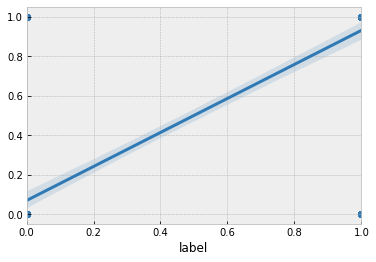

In [61]:
sns.regplot(y_test, predicted_test);

In [62]:
pred_proba_lr = [i[1] for i in gs_model_lr.predict_proba(clean_test_posts)]
pred_df_lr = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba_lr})

pred_df_lr.head()

,true_values,pred_probs
83,0,0.095061
513,1,0.754423
605,0,0.123077
404,1,0.750794
504,0,0.103373


In [144]:
lr_roc = roc_auc_score(y_test,pred_proba_lr)
lr_roc

0.9841729525862069

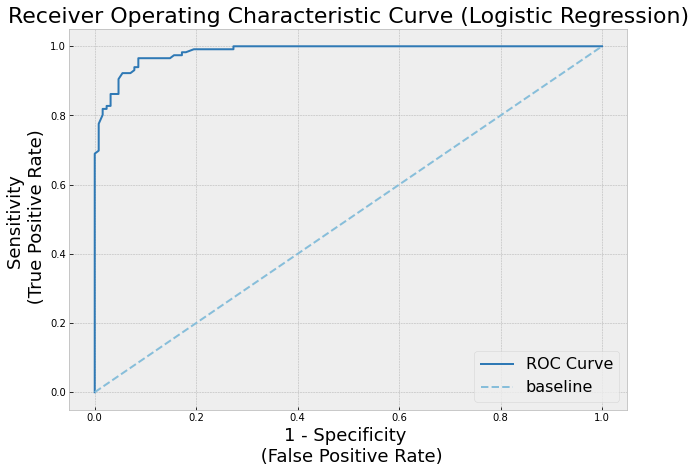

In [64]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_lr, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_lr, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve (Logistic Regression)', fontsize=22)
plt.ylabel('Sensitivity \n (True Positive Rate)', fontsize=18)
plt.xlabel('1 - Specificity \n (False Positive Rate)', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [65]:
gs_model_lr.steps

[('tvec',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=0.9, max_features=2500,
                  min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('lr',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [66]:
words = list(gs_model_lr.steps[0][1].get_feature_names())
coeff = list(np.exp(gs_model_lr.steps[1][1].coef_[0]))

In [67]:
dataframe = pd.DataFrame(data=words)
dataframe['coef'] = coeff
dataframe.columns = ['word', 'coef']

In [68]:
dataframe.sort_values(by='coef')

,word,coef
2081,stori,0.015001
363,charact,0.025298
266,book,0.071734
1476,novel,0.141103
1746,read,0.204908
...,...,...
140,articl,6.649866
2417,websit,7.052665
1460,nich,8.677168
470,content,8.747900


In [69]:
lr_blog_df = dataframe.sort_values(by='coef',ascending=False).head(15)
lr_write_df = dataframe.sort_values(by='coef',ascending=False).tail(15)

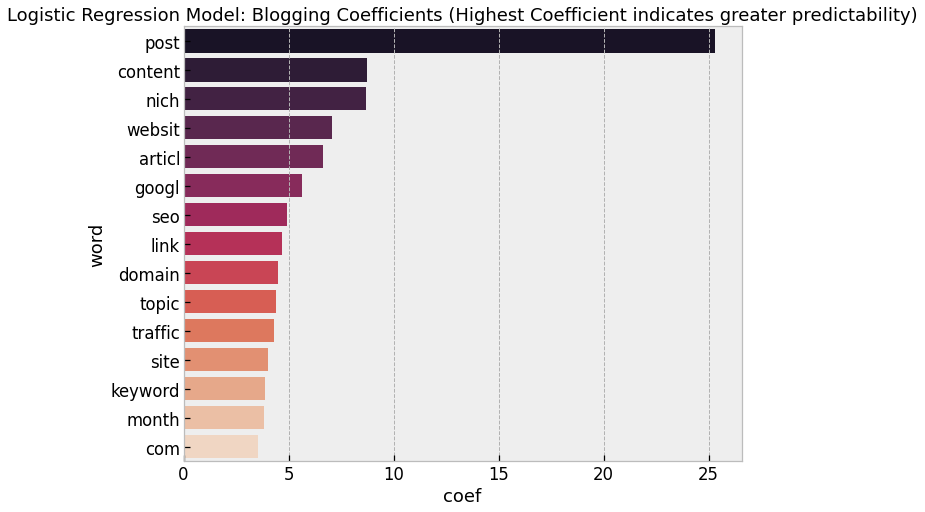

In [70]:
plt.figure(figsize=(10,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.barplot(data=lr_blog_df,y='word',x='coef',palette="rocket")
plt.title("Logistic Regression Model: Blogging Coefficients (Highest Coefficient indicates greater predictability)");

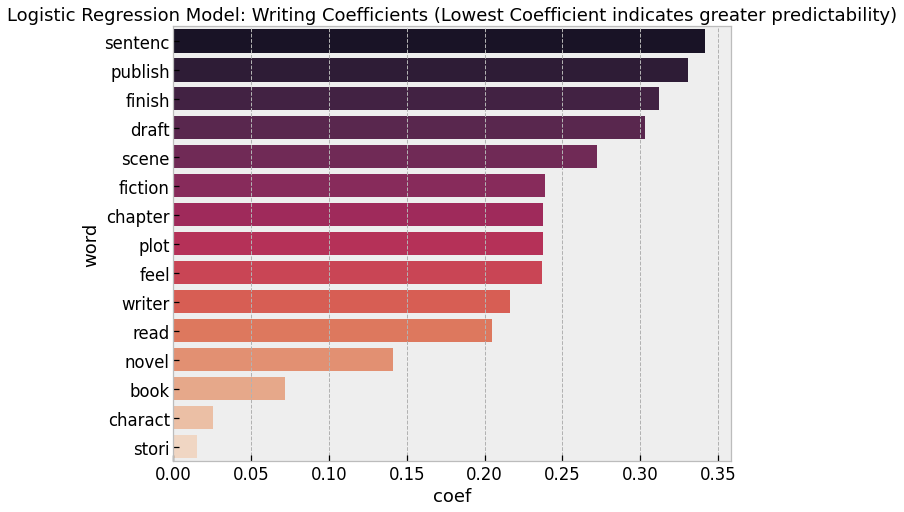

In [71]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
plt.figure(figsize=(10,8))
sns.barplot(data=lr_write_df,y='word',x='coef',palette="rocket")
plt.title("Logistic Regression Model: Writing Coefficients (Lowest Coefficient indicates greater predictability)");

Due to the nature of 

In [72]:
# Generate a confusion matrix.
cm_lr = confusion_matrix(y_test, predicted_test)

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted_test).ravel()

In [74]:
cm_df = pd.DataFrame(cm_lr, columns=['predicted writing', 'predicted blogging'], index=['actual writing', 'actual blogging'])
cm_df

,predicted writing,predicted blogging
actual writing,119,9
actual blogging,8,108


# Naive-Bayes Modelling

In [75]:
# Import our model!
from sklearn.naive_bayes import MultinomialNB

In [76]:
# Instantiate our model!

nb = MultinomialNB(class_prior=[0.4,0.6])

In [77]:
# Fit our model!

model = nb.fit(train_data_features_tvec, y_train)

In [78]:
# Generate our predictions!

predictions = nb.predict(test_data_features_tvec)
predictions

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0])

In [79]:
# Score our model on the training set.
nb.score(train_data_features_tvec, y_train)

0.9825819672131147

In [80]:
# Score our model on the testing set.
nb.score(test_data_features_tvec,y_test)

0.9180327868852459

In [81]:
# Generate a confusion matrix.
confusion_matrix(y_test,predictions)

array([[112,  16],
       [  4, 112]])

In [82]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [83]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 112
False Positives: 16
False Negatives: 4
True Positives: 112


**Observations**

- Confusion matrix suggest that our classifier is generally accurate in predicting our reddit posts into its two correct subreddit groups. 

### Gridsearch

In [84]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [85]:
cross_val_score(pipe, clean_train_posts, y_train, cv=5).mean()

0.940559916274202

In [86]:
pipe_params = {
    'tvec__max_features': [500,1000,2500],
    'tvec__min_df' : [2,4,6],
    'tvec__max_df': [0.9, 0.925, 0.95],
    'tvec__ngram_range': [(1,1),(1,2),(2,3)]}

In [87]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [88]:
gs.fit(clean_train_posts, y_train);

In [89]:
gs.best_score_

0.9405651491365777

In [90]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 2500,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [91]:
gs_model_nb = gs.best_estimator_
gs_model_nb

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=2500,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [92]:
gs_model_nb.score(clean_train_posts, y_train)

0.9723360655737705

In [93]:
gs_model_nb.score(clean_test_posts, y_test)

0.9344262295081968

In [94]:
predicted_test = gs_model_nb.predict(clean_test_posts)

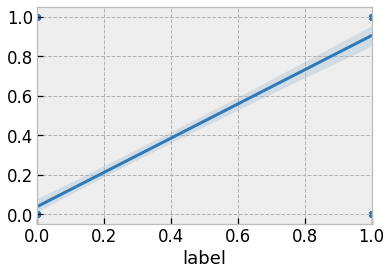

In [95]:
sns.regplot(y_test, predicted_test);

In [96]:
pred_proba_nb= [i[1] for i in gs_model_nb.predict_proba(clean_test_posts)]
pred_df_nb = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba_nb})

pred_df_nb.head()

,true_values,pred_probs
83,0,0.044105
513,1,0.932927
605,0,0.069578
404,1,0.809700
504,0,0.071479


In [146]:
nb_roc = roc_auc_score(y_test,pred_proba_nb)
nb_roc

0.9877424568965517

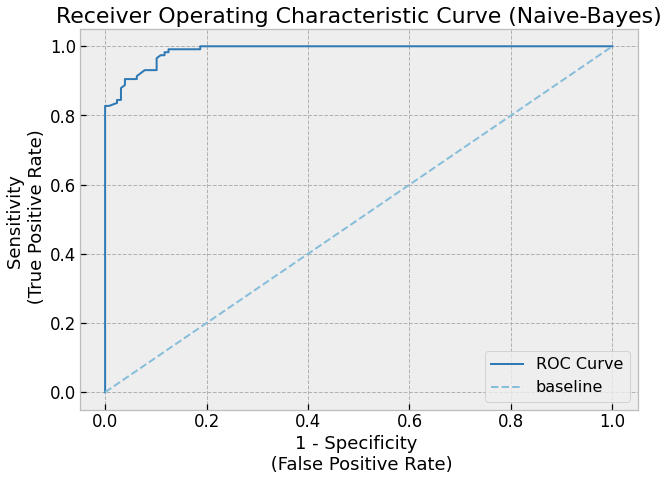

In [98]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_nb, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_nb, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve (Naive-Bayes)', fontsize=22)
plt.ylabel('Sensitivity \n (True Positive Rate)', fontsize=18)
plt.xlabel('1 - Specificity \n (False Positive Rate)', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [99]:
gs_model_nb.steps

[('tvec',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=0.9, max_features=2500,
                  min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [106]:
cm_nb = confusion_matrix(y_test, predicted_test)
tn, fp, fn, tp = cm_nb.ravel()

In [152]:
cm_df = pd.DataFrame(cm_nb, columns=['predicted writing', 'predicted blogging'], index=['actual writing', 'actual blogging'])
cm_df

,predicted writing,predicted blogging
actual writing,123,5
actual blogging,11,105


In [181]:
d = {'y_test': y_test, 'predicted_test': predicted_test,'difference':y_test-predicted_test}
nb_compare = pd.DataFrame(data=d)
nb_index_blogtowrite = nb_compare[nb_compare['difference']==1].index
nb_index_blogtowrite

Int64Index([503, 449, 357, 387, 64, 372, 255, 200, 285, 111, 302], dtype='int64')

In [195]:
# Misclassified from Blogging (Original) to Writing (Predicted)
df.iloc[nb_index_blogtowrite,:]['selftext'][:7]

503    So i have a cool intro about a post, it's basically two 3 line paragraphs, just a funnyintro of how i came up with my topic and how my idea was formulated, got some humour and style in there. And then after that I go straight into the answer highlighted in bold and everything (followed by all the rest). \n\nIf i optimize my meta description tag, can I do this with little worry? Will it negatively affect me? I've worked in short story writing and screenwriting as of recently so the beginning of my posts I always like to start with a dope ass quote relevant to my topic followed by small fun intro, and THEN go into the topic. Rather than just give the answer and be not as fun. If i optimize my meta description, can I have that slight freedom to be creative or no? My intro paragraph is literally two 3 line paragraphs. What y'all think?                                                                                                                                                      

In [184]:
nb_index_writetoblog = nb_compare[nb_compare['difference']==-1].index
nb_index_writetoblog

Int64Index([599, 256, 465, 190, 35], dtype='int64')

In [191]:
# Misclassified from Writing (Original) to Blogging (Predicted)
df.iloc[nb_index_writetoblog,:]['selftext']

21     Don't get me wrong, I do love them. It must be all of the imagination needed to keep the chorography straight in my head.\n\nAnyone else have something about writing that takes a lot out of them? How do you push through?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

**Observations**
- Misclassified posts mainly due to short posts and ambiguous posts (it would be ambiguous after removing stopwords'
- Other misclassfied posts could be due to users posting in the wrong subreddit groups
    - ie. #255 (blogger not able to organise his posts into categories) --> appears to be writing related
    - ie. #256 (writer trying to start a blog that aims to be money generating) --> appears to be blogging related

In [108]:
 (def confusion(cm):
    tn, fp, fn, tp = cm.ravel()
    spec = round(tn / (tn + fp),4)
    sens = round(tp / (tp + fn),4)
    acc = round((tp+tn) / (tp+fn+tn+fp),4)
    return spec,sens,acc

In [109]:
cm_lr_array = confusion(cm_lr)
cm_nb_array = confusion(cm_nb)

In [110]:
cm_lr_array

(0.9297, 0.931, 0.9303)

In [111]:
cm_nb_array

(0.9609, 0.9052, 0.9344)

In [112]:
cm_df_all = pd.DataFrame(cm_lr_array).T
cm_df_all.columns=['Specificity','Sensitivity','Accuracy']
cm_df_all.index=['Logistic Regression Model']
cm_nb_df = pd.DataFrame(cm_nb_array).T
cm_nb_df.columns=['Specificity','Sensitivity','Accuracy']
cm_nb_df.index=['Naive-Bayes Regression']

In [149]:
cm_df_all['ROC'] = lr_roc
cm_df_all

,Specificity,Sensitivity,Accuracy,ROC
Logistic Regression Model,0.9297,0.931,0.9303,0.984173


In [150]:
cm_nb_df['ROC']=nb_roc
cm_nb_df

,Specificity,Sensitivity,Accuracy,ROC
Naive-Bayes Regression,0.9609,0.9052,0.9344,0.987742


# Model Summary

In [142]:
%%html
<style>
table {float:left}
</style>

In [151]:
cm_df_all.append(cm_nb_df)

,Specificity,Sensitivity,Accuracy,ROC
Logistic Regression Model,0.9297,0.9310,0.9303,0.984173
Naive-Bayes Regression,0.9609,0.9052,0.9344,0.987742


|Model|Train|Test|Best Score|
|---|---|---|---|
|**Logistic Regression**|**0.9866**|**0.9303**|**0.9416**|
|Naive-Bayes|0.9723|0.9344|0.9406|


- For Logistic Regression and Naive-Bayes model, both models performed largely the same in accuracy.
- In terms of performance for model predictability, both also performed largely the same, though Logistic Regression has a marginally higher score. 
- Both models are overfitted, but this is due to the nature of our Natural Language Processing experiment. 
- Naives Bayes model far exceeded Logistic Regression model for Specificity metric. 
- However, Logistic Regression performed better in terms of Sensitivity metric.

# Model Testing

In [114]:
str_list = []
def test_text(text):
    text = str(text)
    str_list.append(text)
    return str_list

In [115]:
# Random post from Writing subreddit
s1 = "I am having a very hard time managing my writings lately. No, it's not like I don't know how to show or not to tell; but it is the amount I want to show and not tell.My previous writings were first-person POV like most of the beginners. It is extremely easy to fill all those showing parts describing characters' gestures, thoughts, or even monologues. It was extremely easy to immerse the reader into the plot. Well, it was in my case at least.Now, I am writing a third-person limited POV cause I got fascinated by the writings of George RR Martin. The way he juggled between different characters' perspectives, the shift of attention to the very next character was beautiful and frightening at the same time. For those who do not know what is third-person limited POV, it is the third-person POV but you get to see from the POV of a single character in a scene, which is quite different from omniscient where you get to know all the character and plot at the same time.Back to my problem, I don't know whether I should tell what the character (in light) thinks, or simply show the gestures and dialogues. Should I include any monologues or not, I am even having a hard time making the settings more serious and give it more weight. What should I do?"
test_text(s1)

# Random post from Writing subreddit
s2 = "Agh I’ve always struggled with adding description in to my pieces of writing, like I know I need to add them, but I just never seem to write them! Most of my scenes will end up filled with short sentences describing mostly actions and thoughts but nothing else! Does anyone know any tips or advice on how to make sure you’re adding enough description/how to add description Anything would be appreciated!!! :)"
test_text(s2)

# Random post from Blogging subreddit
s3 = "I know it is impossible to get rid of copycats, and we all borrow information from someone else's work here and there, so none of us is entirely innocent.But how do you deal with situations in which you spend hours, if not days, to do research, verify the validity of the information you plan to claim/provide, research on keywords, write your articles carefully, do editing, etc. just to find out a few minutes after you post your work that someone else has simply copy-pasted yours to theirs? Some copycats do put in some work by paraphrasing the text to avoid Google's ranking penalties, but even so, having all the information available for you to paraphrase takes a lot less time and effort than doing the work yourself."
test_text(s3)

# Random post from Blogging subreddit
s4 = "Hello, we made it to month two of my second site. I am noticing a bit of traction both in terms of organic impressions as well as a few clicks. I've also been lucky to make a few sales already but that is because of my posting on Reddit within my niche (the group allows links if done correctly)I didn't make any money this month, but I did make 2 sales on the very last day. However, I won't get commission until the item ships so that will be in next month's report. I think it will probably be a couple of dollars."
test_text(s4)

# My test post: It should be classified as blogging.
s5 = "I am currently starting a blog on Cooking, sharing recipes about Korean cuisine with the public. I am very inspired by maangchi and her success. However, I have really bad english and I have trouble writing, and I am afraid that it will tarnish the reputation for my blog. Do you have any tips on how to write better? Do you think writing is important to the success of my blog? How do you think I can better promote and monetise my blog? Thank you."
test_text(s5)

# My test post: Similar as before but modified.
s6 = 'Hello everyone, I am currently starting a Blog dedicated to teaching the mass about Korean Cuisine. My main inspiration was from Maangchi. I would like to hear from everyone regarding tips and tricks to promote my blog, and monetise it as well. Currently, my blog has very low traffic (about 2 per day on average). I hope to hear from everyone how you optimise the search engine and promote your blog. Also, I hope to hear from you regarding writing styles. I am a native Korean who is not strong in English. Do you think it will have a negative impact on my blog?'
test_text(s6)

# Another trial text.
s7 = 'Hey all, I am starting a blog to write about marketing technology. May I learn of writing techniques where I will be able to capture the eyes of my audience in seconds? What would be eye catching? I also have issues with starting my content in the body text, and I am unsure how to maximise SEO by crafting my title smartly. Please help, thanks'
test_text(s7)
len(str_list)

7

In [116]:
test_text_predict_lr = gs_model_lr.predict(str_list)
test_text_predict_lr

array([0, 0, 1, 1, 1, 1, 1])

In [117]:
test_text_predict_nb = gs_model_nb.predict(str_list)
test_text_predict_nb

array([0, 0, 1, 1, 0, 1, 1])

In [118]:
true_label = list([0,0,1,1,1,1,1])
pd.DataFrame({'Text' : str_list,
              'True Label' : true_label,
              'Predicted Label (LR)' : test_text_predict_lr,
             'Predicted Label (NB)':test_text_predict_nb }, 
                                columns=['Text','True Label', 'Predicted Label (LR)','Predicted Label (NB)'])

,Text,True Label,Predicted Label (LR),Predicted Label (NB)
0,"I am having a very hard time managing my writings lately. No, it's not like I don't know how to show or not to tell; but it is the amount I want to show and not tell.My previous writings were first-person POV like most of the beginners. It is extremely easy to fill all those showing parts describing characters' gestures, thoughts, or even monologues. It was extremely easy to immerse the reader into the plot. Well, it was in my case at least.Now, I am writing a third-person limited POV cause I got fascinated by the writings of George RR Martin. The way he juggled between different characters' perspectives, the shift of attention to the very next character was beautiful and frightening at the same time. For those who do not know what is third-person limited POV, it is the third-person POV but you get to see from the POV of a single character in a scene, which is quite different from omniscient where you get to know all the character and plot at the same time.Back to my problem, I don't know whether I should tell what the character (in light) thinks, or simply show the gestures and dialogues. Should I include any monologues or not, I am even having a hard time making the settings more serious and give it more weight. What should I do?",0,0,0
1,"Agh I’ve always struggled with adding description in to my pieces of writing, like I know I need to add them, but I just never seem to write them! Most of my scenes will end up filled with short sentences describing mostly actions and thoughts but nothing else! Does anyone know any tips or advice on how to make sure you’re adding enough description/how to add description Anything would be appreciated!!! :)",0,0,0
2,"I know it is impossible to get rid of copycats, and we all borrow information from someone else's work here and there, so none of us is entirely innocent.But how do you deal with situations in which you spend hours, if not days, to do research, verify the validity of the information you plan to claim/provide, research on keywords, write your articles carefully, do editing, etc. just to find out a few minutes after you post your work that someone else has simply copy-pasted yours to theirs? Some copycats do put in some work by paraphrasing the text to avoid Google's ranking penalties, but even so, having all the information available for you to paraphrase takes a lot less time and effort than doing the work yourself.",1,1,1
3,"Hello, we made it to month two of my second site. I am noticing a bit of traction both in terms of organic impressions as well as a few clicks. I've also been lucky to make a few sales already but that is because of my posting on Reddit within my niche (the group allows links if done correctly)I didn't make any money this month, but I did make 2 sales on the very last day. However, I won't get commission until the item ships so that will be in next month's report. I think it will probably be a couple of dollars.",1,1,1
4,"I am currently starting a blog on Cooking, sharing recipes about Korean cuisine with the public. I am very inspired by maangchi and her success. However, I have really bad english and I have trouble writing, and I am afraid that it will tarnish the reputation for my blog. Do you have any tips on how to write better? Do you think writing is important to the success of my blog? How do you think I can better promote and monetise my blog? Thank you.",1,1,0
5,"Hello everyone, I am currently starting a Blog dedicated to teaching the mass about Korean Cuisine. My main inspiration was from Maangchi. I would like to hear from everyone regarding tips and tricks to promote my blog, and monetise it as well. Currently, my blog has very low traffic (about 2 per day on average). I hope to hear from everyone how you optimise the search engine and promote your blog. Also, I hope to hear from you regarding writing styles. I am a native Korean who is not strong in English. Do you think it will ha

# Conclusion

In conclusion, we are rather indifferent about both the Naive Bayes model or the Logistic Regression model in classifying our subreddit posts.
- Both models have achieved a similar accuracy scores, despite having differences in other metrics that we have identified. 
- ROC curve also shown that Naive-Bayes and Logistic Regression is largely similar in performance. 

### Limitations
- As I could only scrape approximately 500-600 posts per subreddit, I believe our model could be more accurate if we increase the number of posts in our training dataset so that the model can learn more through existing data. This has certainly inhibited part of the success of our model. 

### Other useful information
- Overall sentiments for the Writing subreddit tend to be slightly lower than Blogging subreddit. However, both subreddit has a positive sentiment to it. 
- This could be attributed to the level of 'professionalism' displayed in the Blogging subreddit. On the other hand, the Writing subreddit appears to be a community where writers post about their struggles and seek help. Hence, this could have pulled down our overall sentiment for Writing subreddit. 

### Project Extension/Further Research
**Agenda:** To help our blogging clients to optimise their subreddit posts to maximise probability for increased views, upvotes and comments. 
- To conduct predictive analytics on posts vs. number of comments and number of upvotes
- To scrape subreddit post comments and analyse sentiments.